In [ ]:
import pandas as pd

df = pd.read_csv('medical_cases_test.csv') #load dataset

# Calculate lengths
df['transcription_length'] = df['transcription'].apply(lambda x: len(str(x).split()))
df['description_length'] = df['description'].apply(lambda x: len(str(x).split()))


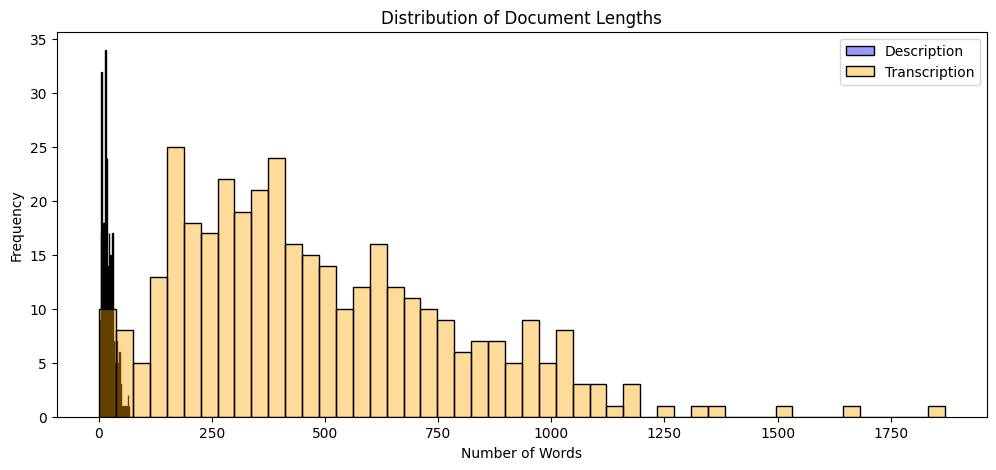

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms
plt.figure(figsize=(12,5))
sns.histplot(df['description_length'], bins=50, color='blue', alpha=0.4, label="Description")
sns.histplot(df['transcription_length'], bins=50, color='orange', alpha=0.4, label="Transcription")
plt.legend()
plt.title("Distribution of Document Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

The above histogram compares the length of descriptions vs transcriptions across the dataset by overlapping on top of each other.

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(df['description_length'], bins=50, color='blue')
plt.title("Description Lengths")
plt.xlabel("Number of Words")

plt.subplot(1,2,2)
sns.histplot(df['transcription_length'], bins=50, color='orange')
plt.title("Transcription Lengths")
plt.xlabel("Number of Words")

plt.tight_layout()
plt.show()


The above histogram compares the length of descriptions vs transcriptions across the dataset by depicting them side by side.

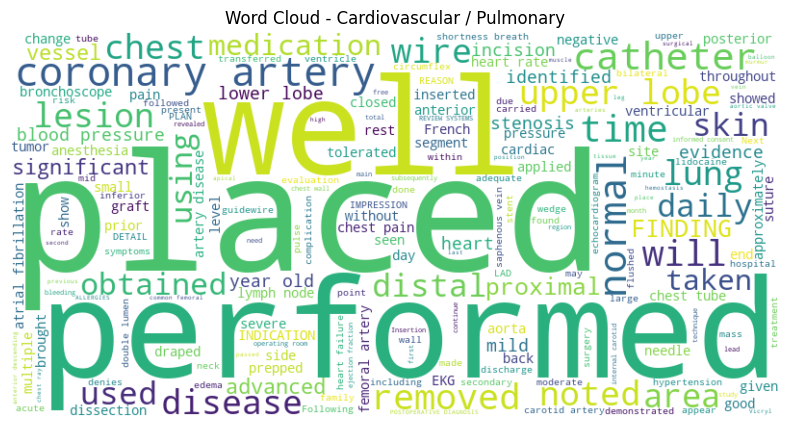

In [12]:
from wordcloud import WordCloud, STOPWORDS

# Add custom stopwords (to remove common non-medical words
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["patient", "procedure", "history", "left", "right", "one", "two", "three"])  


specialty = "Cardiovascular / Pulmonary"
text = " ".join(df[df['medical_specialty'] == specialty]['transcription'].astype(str))

wc = WordCloud(width=800, height=400, background_color='white',
               stopwords=custom_stopwords,
               min_word_length=3,   # removes short meaningless words
               colormap='viridis').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title(f"Word Cloud - {specialty}")
plt.show()


The above code shows the most used text larger and least used text smaller